# 10.3 Exercises

## Exercise 1: The Dataset

Remember the `diabetes` dataset which we used in a few weeks ago to predict the presence of diabetes. This week, our goal will be to explore the six blood serum measures, aiming to find underlying factors within them.

The data is already loaded and processed. Please do the following:
1. Print and read through the description of the dataset using the `.DESCR` attribute
2. Inspect the DataFrame and check if it contains the correct variables
3. Plot the correlation matrix of the blood serum measures (e.g. with `sns.heatmap()` or `plt.imshow()`).

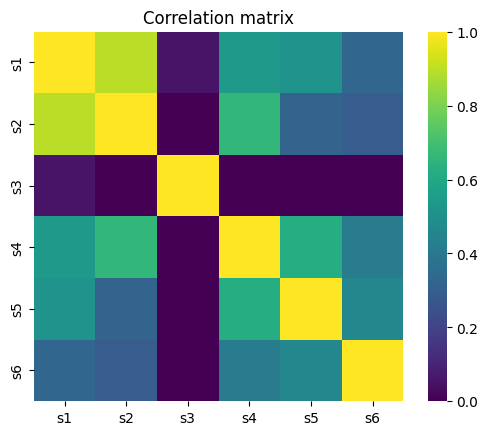

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the six blood serum measures (s1-s6) of the diabetes dataset
diabetes_data = datasets.load_diabetes(as_frame=True)
df = diabetes_data.data[['s1', 's2', 's3', 's4', 's5', 's6']]

# TODO: Exercise 1
ax = sns.heatmap(df.corr(), cmap="viridis", square=True, vmin=0, vmax=1)
ax.set_title("Correlation matrix");

## Exercise 2: Fitting the Model

Use `factor_analyzer` package to fit a first non-rotated model with the `minres` optimizer and the number of factors corresponding to the number of items. Determine the most suitable number of factors using the Kaiser criterion.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


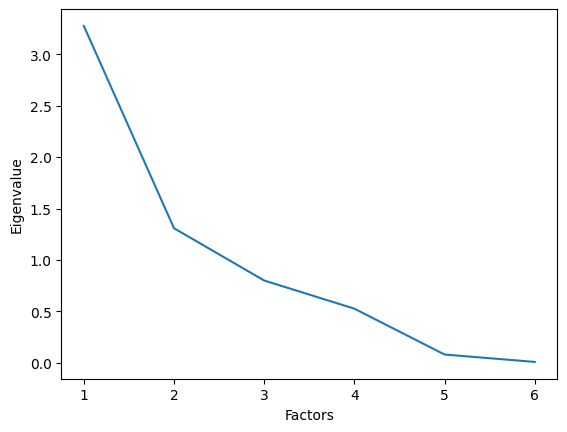

In [16]:
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer

# TODO: Exercise 2

fa = FactorAnalyzer(n_factors=9, rotation=None, method = 'minres')
fa.fit(df);

ev, __ = fa.get_eigenvalues()

ax = sns.lineplot(x=range(1, len(ev) + 1), y=ev)
ax.set_xlabel("Factors")
ax.set_ylabel("Eigenvalue");


## Exercise 3: Loadings & Communalities

After selecting the number of factors, fit a final model with `oblimin` rotation. Print the rotated factor loadings and communalities. Do the communalities suggest a good model fit?

In [15]:
# TODO: Exercise 3

fa2 = FactorAnalyzer(n_factors=2, rotation='promax', method='ml')
fa2.fit(df);

loadings_p =fa2.loadings_

communalities_p = fa2.get_communalities()
print(loadings_p)
print(communalities_p)


[[ 1.14301275  0.35202994]
 [ 0.95119658  0.04169628]
 [ 0.37522406  1.14923092]
 [ 0.37822598 -0.68189247]
 [ 0.4487839  -0.30291246]
 [ 0.28007515 -0.21689898]]
[1.43040323 0.90651351 1.46152479 0.60803223 0.29316295 0.12548726]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## Voluntary exercise 1: Improving the Fit

Look again at the **Communalities**. Some variables are badly represented by the factor structure. Exclude them and fit the model again. Did the fit improve?

In [ ]:
# TODO: Voluntary exercise 1